<a href="https://colab.research.google.com/github/celcof/Modelling/blob/master/Gewurz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
install.packages('TraMineR', repos='http://cran.rstudio.com/')
library(TraMineR)
install.packages('reshape2', repos='http://cran.rstudio.com/')
library(reshape2)
install.packages('cluster', repos='http://cran.rstudio.com/')
library(cluster)
install.packages('purrr', repos='http://cran.rstudio.com/')
library(purrr)
install.packages('factoextra', repos='http://cran.rstudio.com/')
library(factoextra)
install.packages('ggplot2', repos='http://cran.rstudio.com/')
library(ggplot2)
library(Hmisc)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘Formula’, ‘latticeExtra’, ‘acepack’, ‘gridExtra’, ‘data.table’, ‘htmlTable’, ‘viridis’, ‘Hmisc’



TraMineR stable version 2.2-0.1 (Built: 2020-05-30)

Website: http://traminer.unige.ch

Please type 'citation("TraMineR")' for citation information.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘corrplot’, ‘car’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cow

Change of day id with a "Night ID" that considers as night of a given day the time that goes from 16 of day before to the 16 of present day. For this reason, we are losing some information, regarding the first and last hours of the analysis.

In [0]:
U <- read.csv("Time Diary smartunitn2.csv")
U <- data.frame(U[1:26], smartphoneTime=rowSums(U[27:57]))
U <- U[,c(1,6,7,8,9,10,27)]
U$hh <- formatC(U$hh, width = 2, format = "d", flag = "0")
U$mm <- formatC(U$mm, width = 2, format = "d", flag = "0")
U$time <- paste(U$hh, U$mm, sep="")
U$time <- format(strptime(U$time, format="%H%M"), format = "%H:%M")
names <- U$time[1:48]

U$Y <- 2018
U$NN <- ifelse(U$time > 16, U$GG+1, U$GG)
U <- U[!(U$NN == 9) & !(U$NN == 25),]
U$date <- paste(U$Y, U$MM, U$NN, sep="-")
U$date <- format(as.Date(U$date), "%Y-%m-%d")
U$day <- weekdays(as.Date(U$date))
U <- U[,-c(2,3,4,5,9,11)]
U <- reshape(U, idvar = c("id","NN","day") , v.names=c("time", "cosar", "smartphoneTime"), direction="wide")
U <- U[, -grep("time", colnames(U))]
names(U) <- gsub("cosar.", "", names(U), fixed=T)
row.names(U) <- 1:nrow(U)
U[is.na(U)] <- 0
U <- data.frame(U[1:3], U[seq(4,98,by=2)], smtpTime = rowSums(U[seq(5,99,by = 2)]))
colnames(U) <- gsub("X", "", colnames(U), fixed=T)
str(U)

'data.frame':	2370 obs. of  52 variables:
 $ id      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ NN      : num  10 11 12 13 14 15 16 17 18 19 ...
 $ day     : chr  "Thursday" "Friday" "Saturday" "Sunday" ...
 $ 16.02   : int  12 7 26 3 6 4 4 20 10 7 ...
 $ 16.32   : int  12 10 26 6 6 4 4 20 10 7 ...
 $ 17.02   : int  12 20 26 6 6 10 4 17 26 7 ...
 $ 17.32   : int  12 6 26 6 6 17 4 9 26 7 ...
 $ 18.02   : int  6 6 26 6 6 17 4 26 26 7 ...
 $ 18.32   : int  6 6 12 6 6 17 4 7 25 7 ...
 $ 19.02   : int  6 6 12 6 16 17 4 8 17 7 ...
 $ 19.32   : int  6 6 12 6 16 17 26 4 13 7 ...
 $ 20.02   : int  6 10 12 6 7 14 10 25 13 7 ...
 $ 20.32   : int  6 10 20 6 7 25 10 3 13 3 ...
 $ 21.02   : int  3 6 6 16 7 25 7 3 3 3 ...
 $ 21.32   : int  6 6 3 10 7 25 7 20 8 3 ...
 $ 22.02   : int  7 6 3 20 7 3 10 12 3 7 ...
 $ 22.32   : int  7 6 7 3 7 7 25 12 13 7 ...
 $ 23.02   : int  7 6 20 3 7 7 7 12 7 7 ...
 $ 23.32   : int  25 6 6 6 7 7 7 12 7 7 ...
 $ 00.02   : int  2 6 6 6 7 7 7 12 1 7 ...
 $ 00.32   : int  1 1 6 6 

 [>] state coding:

       [alphabet]  [label]  [long label] 

     1  other       OT       other

     2  sleep       SL       sleep

     3  study       ST       study

 [>] 2370 sequences in the data set

 [>] min/max sequence length: 48/48

 [>] state coding:

       [alphabet]  [label]  [long label] 

     1  other       OT       other

     2  sleep       SL       sleep

 [>] 2370 sequences in the data set

 [>] min/max sequence length: 48/48



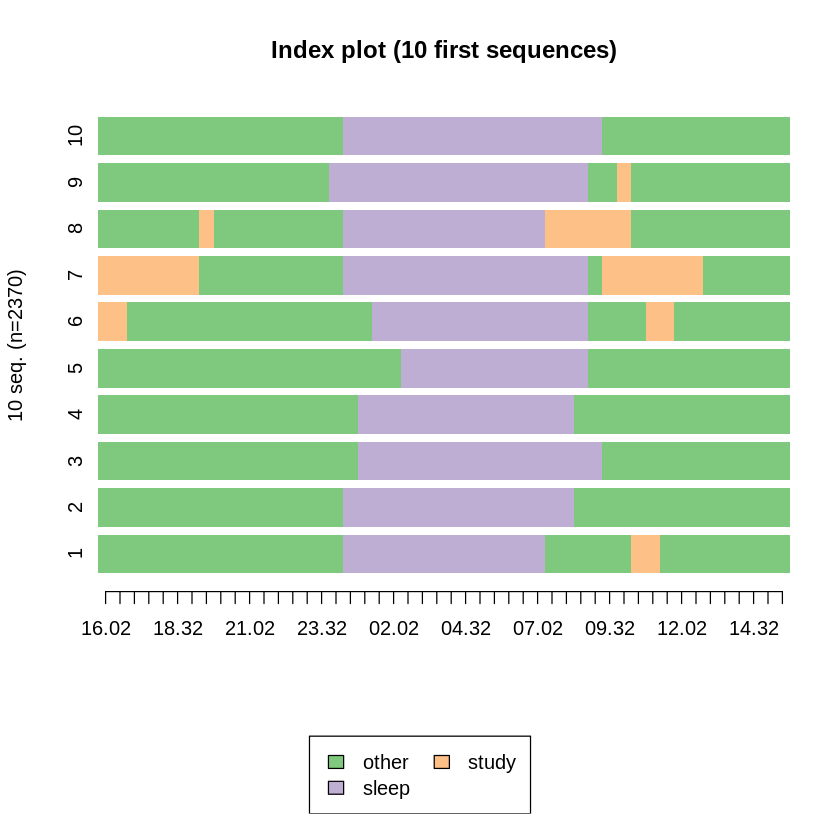

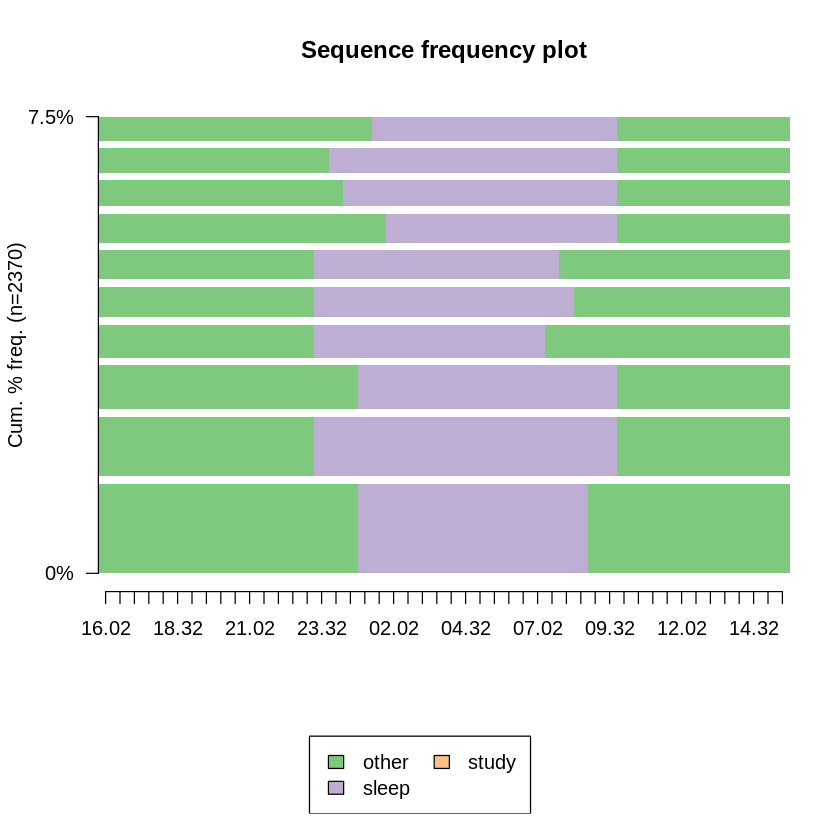

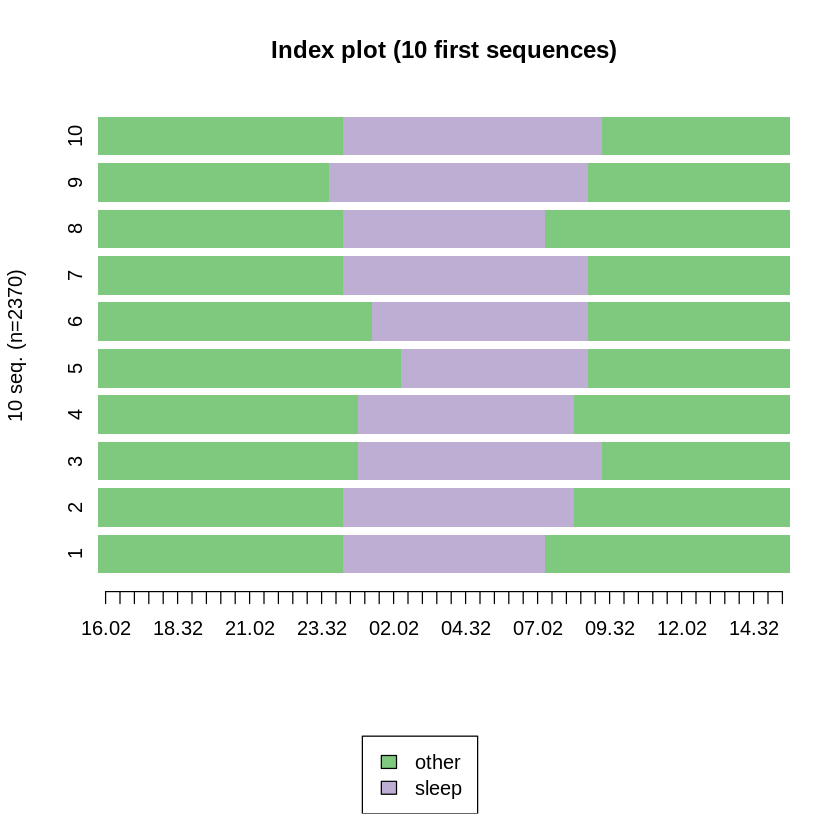

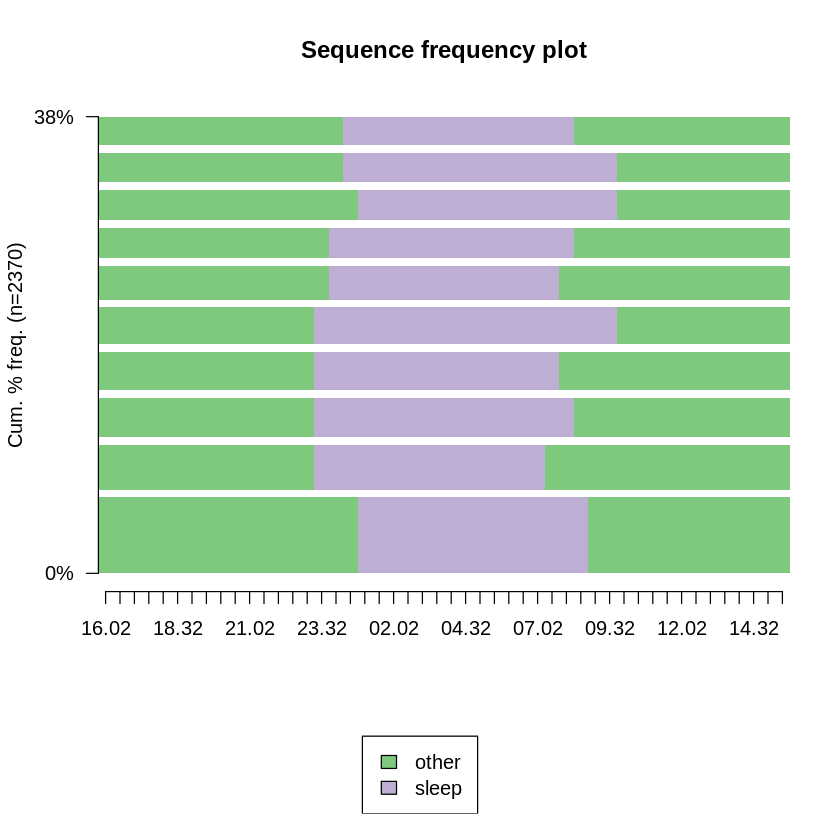

In [0]:
# no info = 0
# sleeping = 1
# studying = 4
# other
V <- U

for(j in 1:nrow(U)) {
  for(k in 4:(ncol(U)-1)) {
    if (U[j,k] == 4) {
      U[j,k] <- 'study'
      V[j,k] <- 'other'
    } else if (U[j,k] == 1) {
      U[j,k] <- 'sleep'
      V[j,k] <- 'sleep'
    } else {
      U[j,k] <- 'other'
      V[j,k] <- 'other'
    }
  }
}

labs <- c("other", "sleep", "study")
states <- c("OT", "SL", "ST")
U_sequence <- seqdef(U, 4:51, states = states, labels = labs)
V_sequence <- seqdef(V, 4:51, states = c("OT", "SL"), labels = c("other", "sleep"))

### sleep
# the indeU plot of the first 10 sequences
seqiplot(U_sequence, with.legend = T, main = "Index plot (10 first sequences)",border = NA)
# the sequence frequency plot of the 10 most frequent sequences with bar width propor- tional to the frequencies
seqfplot(U_sequence, with.legend = T, border = NA, main = "Sequence frequency plot")

### only sleep and other
# the indeU plot of the first 10 sequences
seqiplot(V_sequence, with.legend = T, main = "Index plot (10 first sequences)",border = NA)
# the sequence frequency plot of the 10 most frequent sequences with bar width propor- tional to the frequencies
seqfplot(V_sequence, with.legend = T, border = NA, main = "Sequence frequency plot")




,16.02,16.32,17.02,17.32,18.02,18.32,19.02,19.32
OT,0.6489451,0.6662447,0.6506329,0.6654008,0.6810127,0.7375527,0.8493671,0.892827
SL,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000
ST,0.3510549,0.3337553,0.3493671,0.3345992,0.3189873,0.2624473,0.1506329,0.107173


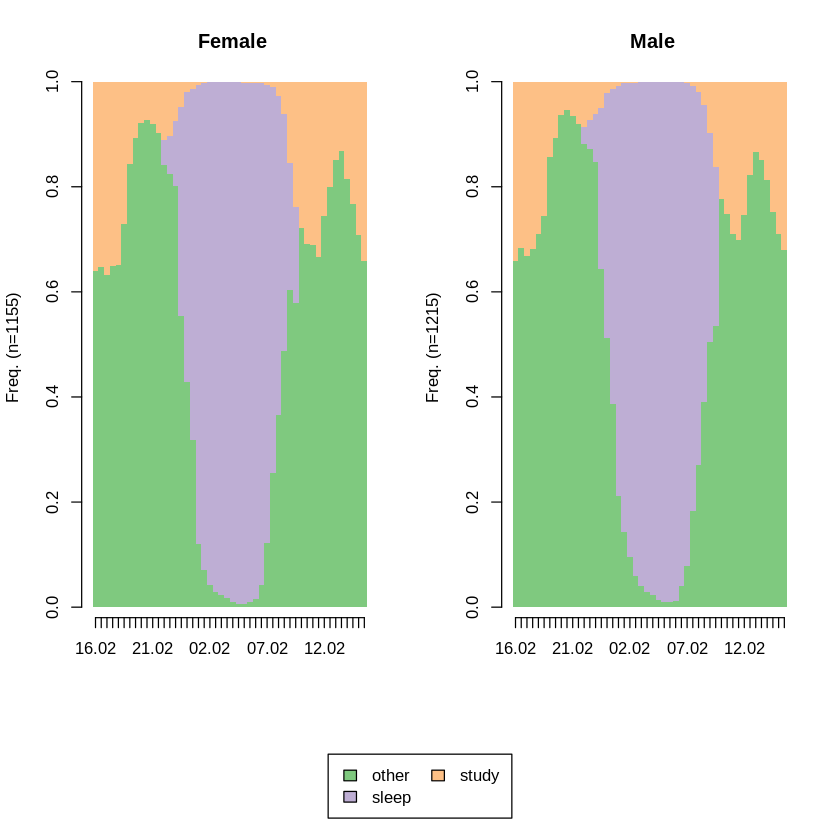

In [0]:
# aggiungere colonne sesso, tipolaurea, emotionalstability,procastination
data <- read.csv("Respondent smartunitn2.csv")
df2 <- data[, c(1,2,5,6,9,12)]
for (row in 1:nrow(df2)){
  if (df2$sex[row] == 1) {
    df2$sex[row] <- 'Female'
  } else {
    df2$sex[row] <- 'Male' 
  }
}

finalU <- merge(U, df2, by = 'id')
seqstatd(U_sequence[, 1:8])
seqdplot(U_sequence, group = finalU$sex, border = NA)

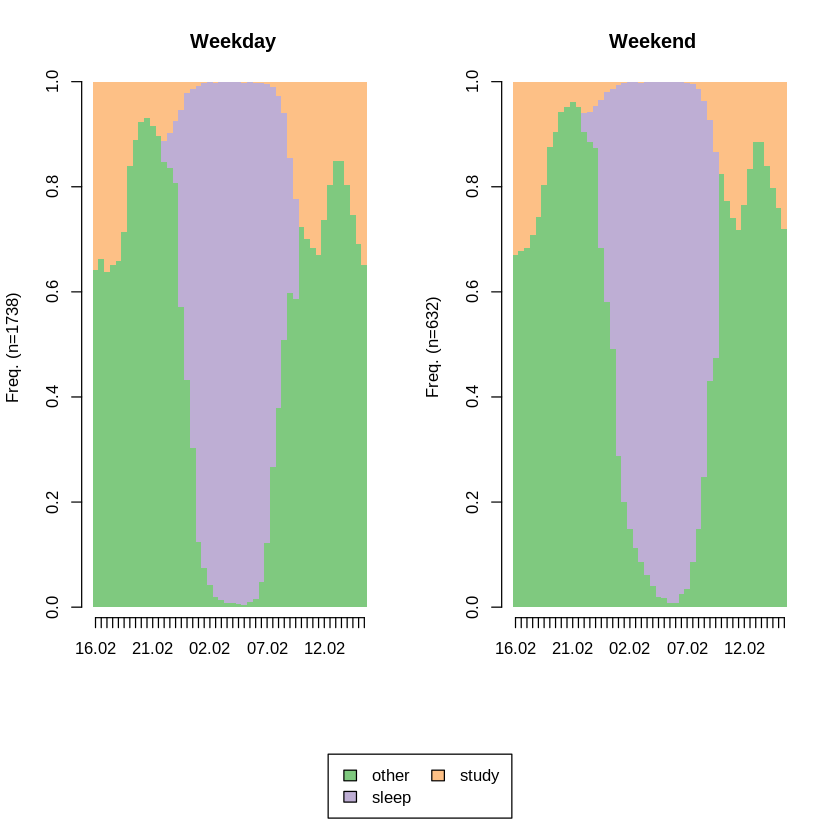

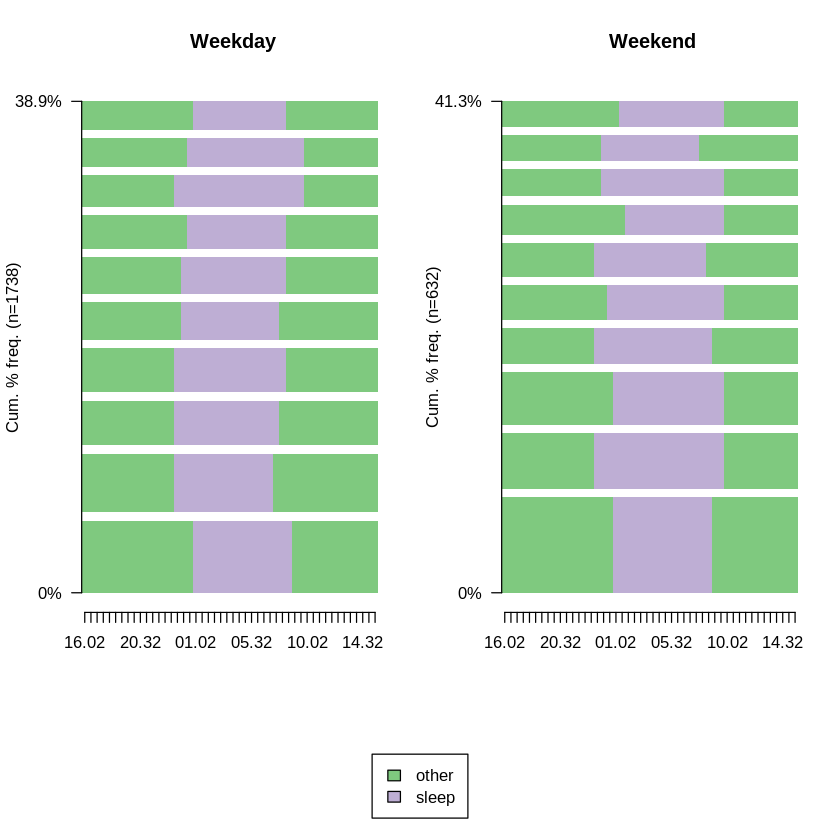

In [0]:
finalU$weekday <- ''
for (row in 1:nrow(finalU)){
  if (finalU$day[row] == 'Sunday' |  finalU$day[row] == 'Saturday') {
    finalU$weekday[row] <- 'Weekend'
  } else {
    finalU$weekday[row] <- 'Weekday' 
  }
}

seqdplot(U_sequence, group = finalU$weekday, border = NA)
seqfplot(V_sequence, with.legend = T, border = NA, , group = finalU$weekday)

A student, on an average day, spends 550 minutes on the phone. For more than 900 minutes spent on the phone (equivalent to 15 hours) we create a danger zone and label the row accordingly.

 [>] state coding:

       [alphabet]  [label]  [long label] 

     1  other       OT       other

     2  sleep       SL       sleep

     3  study       ST       study

 [>] 1494 sequences in the data set

 [>] min/max sequence length: 48/48

 [>] state coding:

       [alphabet]  [label]  [long label] 

     1  other       OT       others

     2  sleep       SL       sleep

 [>] 1494 sequences in the data set

 [>] min/max sequence length: 48/48



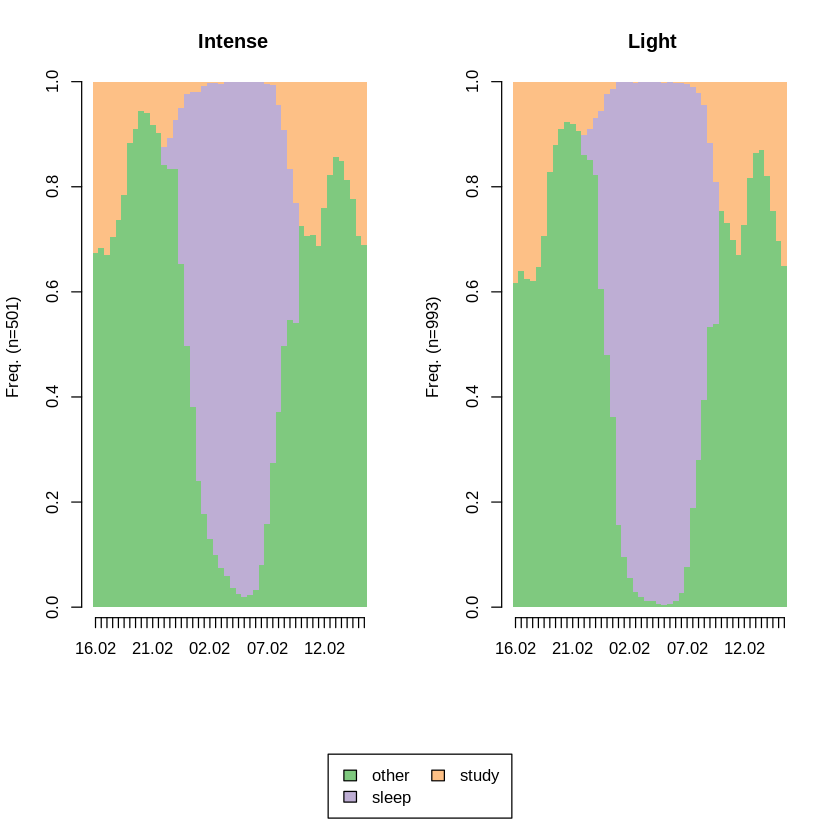

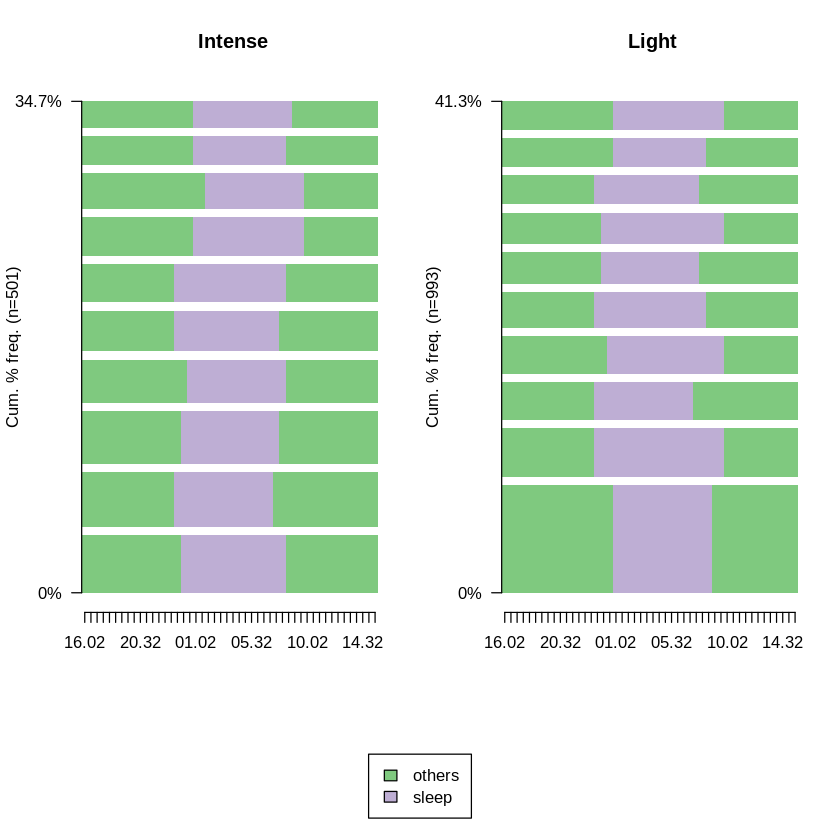

In [0]:
for (row in 1:nrow(finalU)){
  if (finalU$smtpTime[row] < 500) {
    finalU$SPUse[row] <- "Light"
  } else if (finalU$smtpTime[row] > 900) {
    finalU$SPUse[row] <- "Intense"
  } else {
    finalU$SPUse[row] <- "Normal"
  }
}

V$SPUse <- finalU$SPUse
A <- finalU[finalU$SPUse != "Normal",]
B <- V[V$SPUse != "Normal",] 
labs <- c("other", "sleep", "study")
states <- c("OT", "SL", "ST")
A_sequence <- seqdef(A, 4:51, states = states, labels = labs)
B_sequence <- seqdef(B, 4:51, states = c("OT", "SL"), labels = c("others", "sleep"))

seqdplot(A_sequence, group = A$SPUse, border = NA)
seqfplot(B_sequence, with.legend = T, border = NA, group = B$SPUse)

Group.1,sex,ANNO_NASCITA,sede,tiplau,annocor,Agreeableness,Conscientiousness,Emot_stability,Extroversion,Openness,procrast,phonesind,geststres
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.21700392,0.2764747,0.102701117,-0.4803311,-0.2308034,-0.17296473,-0.6955701,-0.4636299,-0.4408756,-0.04910415,0.7243012,0.7346901,0.7081287
2,0.12432820,-1.3626044,-0.140085880,1.6301816,1.3493298,-0.06588571,0.3168969,0.2415839,0.1859130,0.19150620,-0.1782787,-0.1617062,-0.2335747
3,0.09562236,0.6079923,0.003984502,-0.6095461,-0.6359305,0.17620598,0.3559662,0.2188697,0.2346820,-0.07737624,-0.4626139,-0.4808430,-0.4163592


Group.1,sex,ANNO_NASCITA,sede,tiplau,annocor,Agreeableness,Conscientiousness,Emot_stability,Extroversion,Openness,procrast,phonesind,geststres
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.8848564,0.3391266,-0.1028889,-0.3778502,-0.2948755,-0.19945354,-0.3656098,-1.1044553,-0.3773463,0.2289270,0.3572213,0.93255239,1.252524019
2,0.6250709,0.2994451,0.3271822,-0.6095461,-0.3207852,-0.21850874,-0.6311270,0.3142843,-0.3777263,-0.4551742,0.5313462,-0.04129926,-0.003606187
3,-0.1875711,0.7184891,-0.1503062,-0.6095461,-0.7131554,0.42955775,0.6269454,0.1839249,0.4856263,0.1543926,-0.6434928,-0.43432567,-0.623588907
4,0.1243282,-1.3626044,-0.1400859,1.6301816,1.3493298,-0.06588571,0.3168969,0.2415839,0.1859130,0.1915062,-0.1782787,-0.16170624,-0.233574724


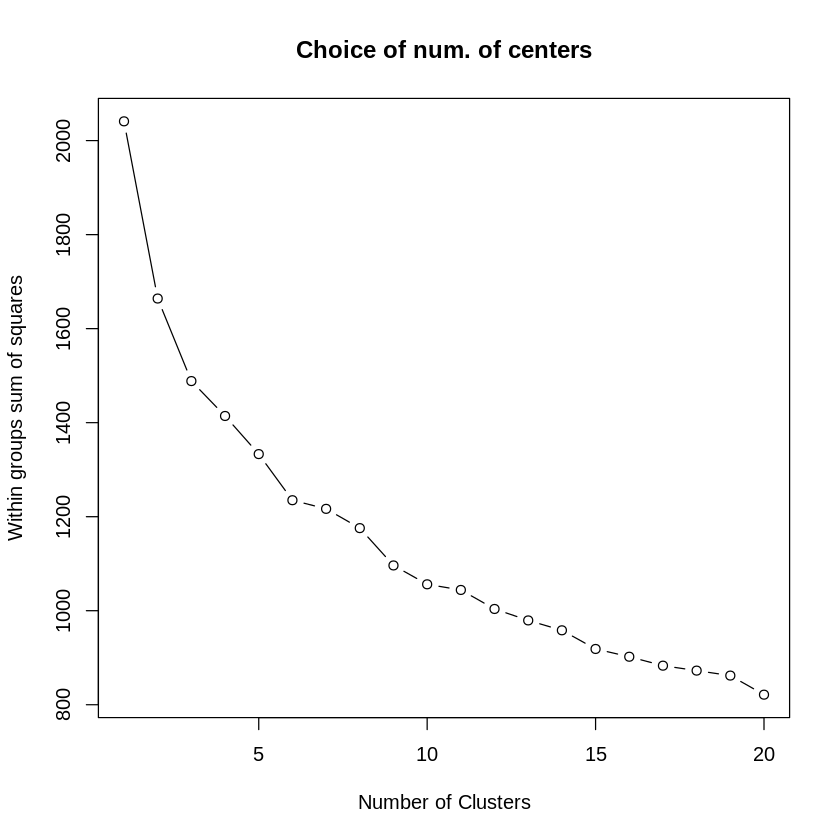

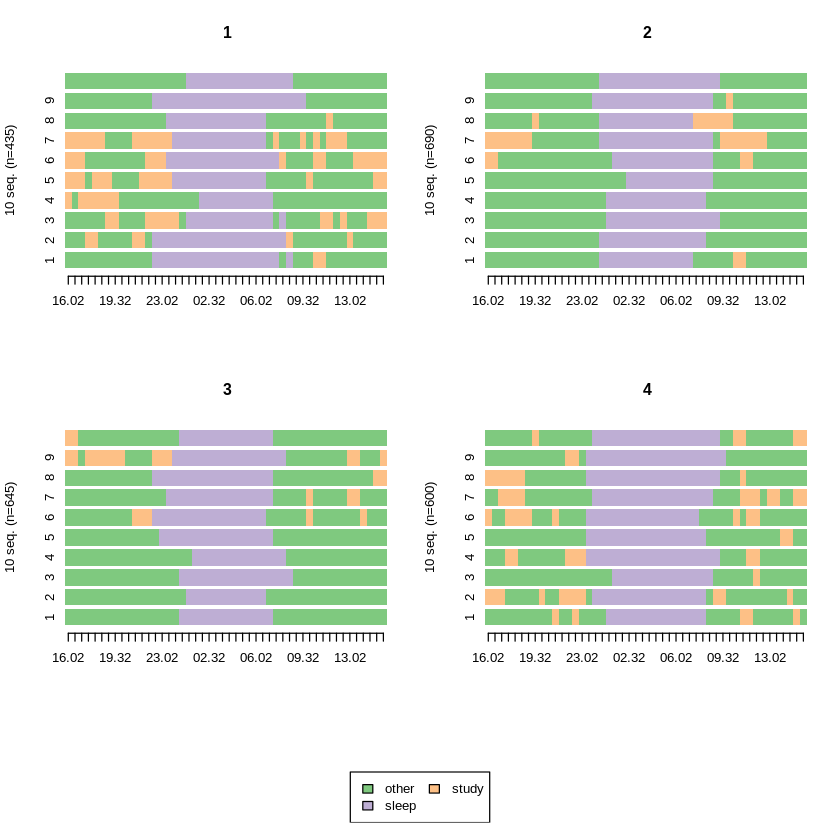

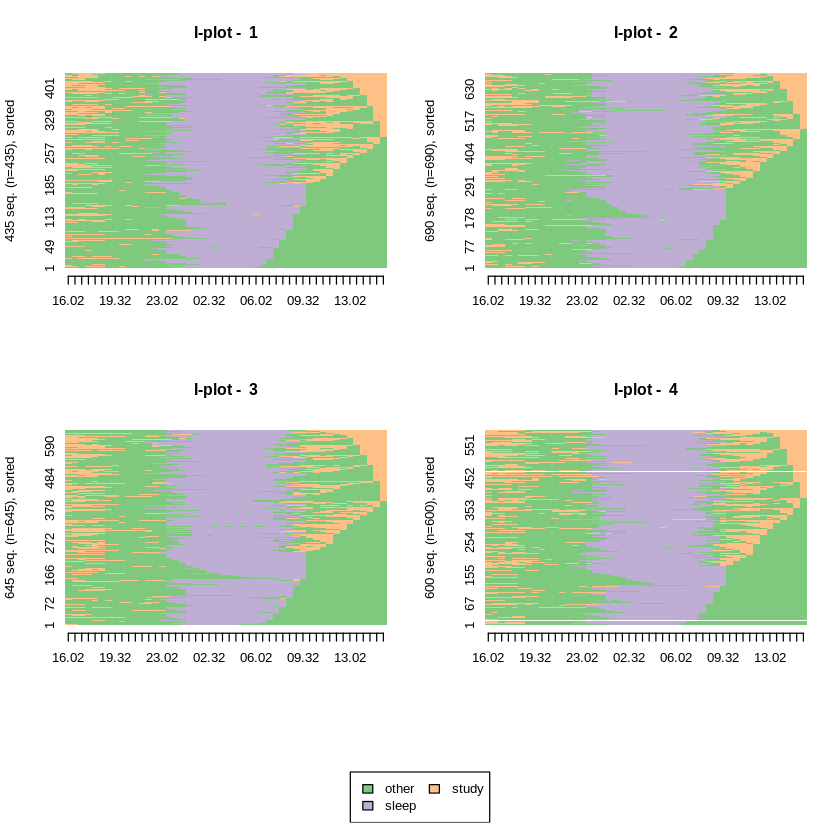

In [0]:
### Cluster analysis

# k-means

data_resp <- read.csv("Respondent smartunitn2.csv")

scaled_df <- data.frame(scale(data_resp[, 2:14])) 


within_var <- (nrow(scaled_df)-1)*sum(apply(scaled_df,2,var)) 
for (i in 2:20) within_var[i] <- sum(kmeans(scaled_df, centers=i)$withinss)
# il vettore within var mi dice la variance interna ad ogni cluster per diversi k
plot(1:20, within_var, type="b", xlab="Number of Clusters",
     ylab="Within groups sum of squares", main = 'Choice of num. of centers')

k3 <- kmeans(scaled_df, centers = 3)
k4 <- kmeans(scaled_df, centers = 4)

aggregate(scaled_df,by=list(k3$cluster),FUN=mean)
aggregate(scaled_df,by=list(k4$cluster),FUN=mean)

data_resp$cluster <- k4$cluster


### Different groups

df2 <- data_resp[, c(1,2,5,6,9,12,20)]
for (row in 1:nrow(df2)){
  if (df2$sex[row] == 1) {
    df2$sex[row] <- 'Female'
  } else {
    df2$sex[row] <- 'Male' 
  }
}

finalU <- merge(U, df2, by = 'id')
seqplot(U_sequence, group = finalU$cluster, border = NA)
seqIplot(U_sequence, group = finalU$cluster, with.legend = T, main = "I-plot", sortv = "from.end")


 [>] creating substitution-cost matrix using transition rates ...

 [>] computing transition probabilities for states OT/SL/ST ...

 [>] 2370 sequences with 3 distinct states

 [>] checking 'sm' (size and triangle inequality)

 [>] 1970 distinct  sequences 

 [>] min/max sequence lengths: 48/48

 [>] computing distances using the OM metric

 [>] elapsed time: 19.673 secs



average    single  complete      ward 
0.9609052 0.8721280 0.9661361 0.9953781

c4
Cluster 1 Cluster 2 Cluster 3 Cluster 4 
      750       691       701       228 

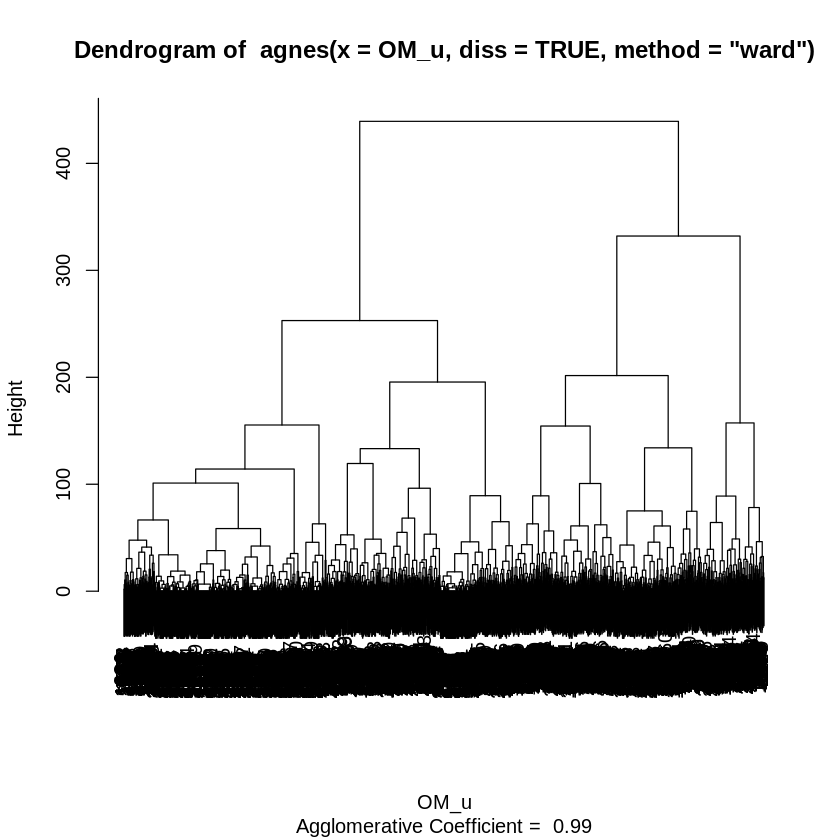

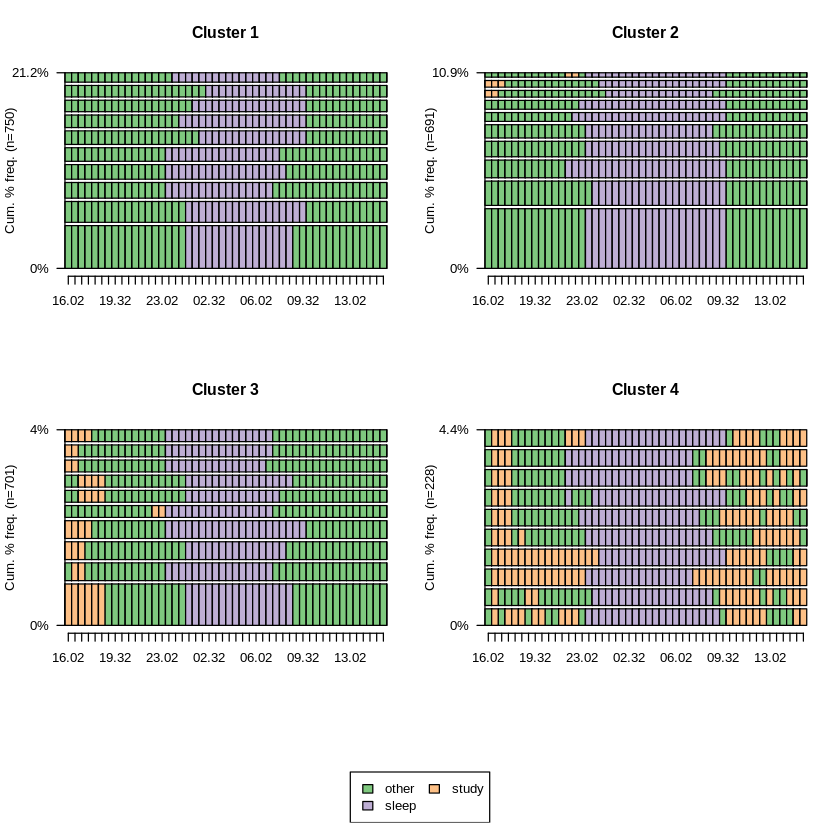

ERROR: ignored

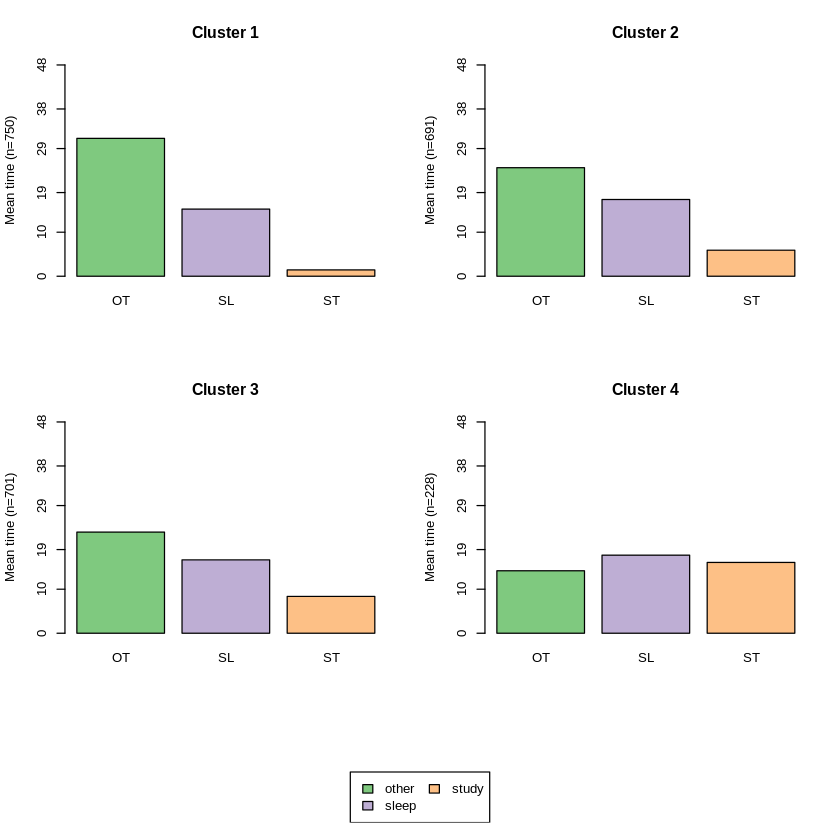

In [0]:
### TRAMINER

# Using the OptimalMatrix distance

df2 <- data_resp[, c(1,2,5,6,9,12)]
for (row in 1:nrow(df2)){
  if (df2$sex[row] == 1) {
    df2$sex[row] <- 'Female'
  } else {
    df2$sex[row] <- 'Male' 
  }
}

finalU <- merge(U, df2, by = 'id') 


subcos_matrix <- seqsubm(U_sequence, method = "TRATE")
# subcos_matrix <- seqsubm(U_sequence, method = "CONSTANT") the result is not that different but we keep 
# a different cost for OT --> SL and SL --> OT cause they are more often (?)
OM_u <- seqdist(U_sequence, method = "OM", sm = subcos_matrix)

# using the matrix for clustering 

# check for the best clustering method 
# from: https://bradleyboehmke.github.io/HOML/hierarchical.html
methods <- c( "average", "single", "complete", "ward")
names(methods) <- c( "average", "single", "complete", "ward")
# function to compute coefficient
ac <- function(x) {
  agnes(OM_u, method = x)$ac
}
purrr::map_dbl(methods, ac)   # ward as best method to be chosen


# Determine also the optimal number of cluster
# from: https://bradleyboehmke.github.io/HOML/hierarchical.html
p1 <- fviz_nbclust(OM_u, FUN = hcut, method = "wss", 
                   k.max = 10) +
  ggtitle("(A) Elbow method") # no clear elbow
p2 <- fviz_nbclust(OM_u, FUN = hcut, method = "silhouette", 
                   k.max = 10) +
  ggtitle("(B) Silhouette method") # the more clusters, the better apparently


#WARD = minimize the total within-cluster variance
cluster_OM <- agnes(OM_u, diss = TRUE, method = "ward") 
plot(cluster_OM, which.plots = 2)

# since i have not a clear definition of cluster - and that i do not want many of them -
# i decide where to cut graphically from the dendrogram
c4 <- cutree(cluster_OM, k = 4)
c4 <- factor(c4, labels = c("1", "2", "3", "4"))
table(c4)

seqfplot(U_sequence, group = c4, pbarw = T)
seqmtplot(U_sequence, group = c4)


mode_cluster <- function(x){
  uni_val <- unique(x)
  moda <- uni_val[which.max(tabulate(match(x, uni_val)))]
  return(moda)
}

data$cluster <- ''
for (i in (1:nrow(data))){
  data$cluster[i] <- mode_cluster(finalU$c4[finalU$id == data$id[i]])
}



In [0]:
finalU$Class <- c4

In [0]:
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

ClU <- finalU %>%
  group_by(id) %>%
  summarise(Class <- getmode(c4))

ERROR: ignored